In [1]:
from dcr import *

In [2]:
data, _, _, _, _, _, _ = dataprep(data)

In [3]:
data['default_time']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
58996    0.0
58997    0.0
58998    0.0
58999    0.0
59000    0.0
Name: default_time, Length: 59001, dtype: float64

In [5]:
data['PD'] = data['default_time'].mean()

In [10]:
data_default = data.loc[data['default_time'] == 1, :].copy()


In [12]:
data_default.loc[:, 'res_period'] = data_default.loc[:, 'res_time'] - data_default.loc[:, 'time']


<Axes: >

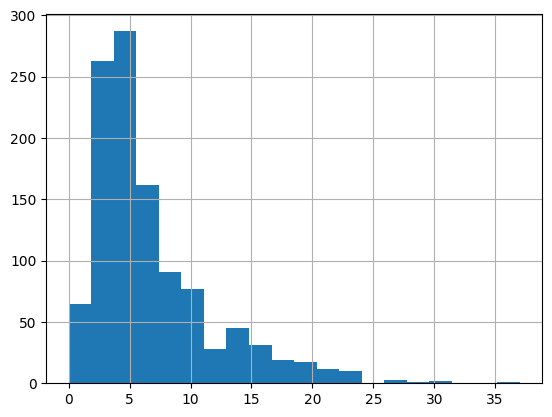

In [13]:
data_default.loc[:, 'res_period'].hist(bins=20)
